**Step 1: Collect and Preprocess Customer Data**

In [ ]:
import pandas as pd

df = pd.read_csv('customer_segmentation_data.csv')

# Checking for missing values
print(df.isnull().sum())


print(df.head())


id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64
   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics   

**Step 2: Standardize/Normalize**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Scaleing the numeric data
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Viewing the scaled data
print(df.head())


         id       age  gender    income  spending_score  membership_years  \
0 -1.730320 -0.384644  Female  0.316868        1.358468         -0.865010   
1 -1.726856 -1.515362  Female -0.282016        0.321865         -1.215358   
2 -1.723391  1.078639  Female  1.112778       -0.714738         -1.215358   
3 -1.719927 -0.251618   Other -1.210096        0.805613          1.237080   
4 -1.716463  1.411203  Female  1.523374       -1.025718         -0.865010   

   purchase_frequency preferred_category  last_purchase_amount  
0           -0.182348          Groceries             -1.281540  
1            1.082005             Sports             -1.523763  
2            0.098620           Clothing             -0.230005  
3           -1.516943      Home & Garden              1.690080  
4           -0.112106        Electronics             -0.491443  


**Step 3: Apply K-means Clustering**

In [ ]:
from sklearn.cluster import KMeans

# Set no. of cluster
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data
kmeans.fit(df[numeric_columns])

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

print(df.head())


         id       age  gender    income  spending_score  membership_years  \
0 -1.730320 -0.384644  Female  0.316868        1.358468         -0.865010   
1 -1.726856 -1.515362  Female -0.282016        0.321865         -1.215358   
2 -1.723391  1.078639  Female  1.112778       -0.714738         -1.215358   
3 -1.719927 -0.251618   Other -1.210096        0.805613          1.237080   
4 -1.716463  1.411203  Female  1.523374       -1.025718         -0.865010   

   purchase_frequency preferred_category  last_purchase_amount  Cluster  
0           -0.182348          Groceries             -1.281540        2  
1            1.082005             Sports             -1.523763        0  
2            0.098620           Clothing             -0.230005        2  
3           -1.516943      Home & Garden              1.690080        0  
4           -0.112106        Electronics             -0.491443        2  


**Step 4: Analyze the Clusters**

In [ ]:
# centroids
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Check the number of customers in each cluster
print("Cluster Sizes:")
print(df['Cluster'].value_counts())


Cluster Centers:
[[-0.88394175 -0.47505967 -0.64998704 -0.37298259 -0.17891123  0.45751142
   0.17579127]
 [ 0.44447245 -0.38766709  0.68457753  0.15834716  0.62485517  0.87660109
   0.09805983]
 [-0.88410463  0.48400783  0.50224723  0.21900102  0.13114169 -0.51640115
  -0.38939843]
 [ 0.60724281  0.86517086 -0.36309896  0.39350468 -0.63939311  0.16518379
   0.28576316]
 [ 0.78009207 -0.50647423 -0.24942863 -0.40803314  0.02126719 -0.89554585
  -0.11509443]]
Cluster Sizes:
Cluster
2    217
4    202
1    198
0    192
3    191
Name: count, dtype: int64


**Step 5: Visulization**

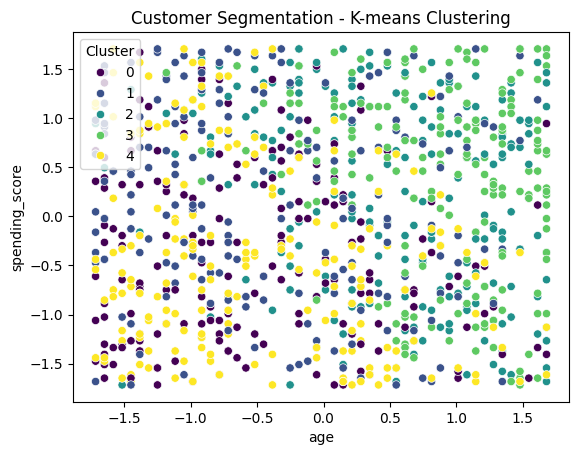

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize clusters using two numeric column
sns.scatterplot(x=df['age'], y=df['spending_score'], hue=df['Cluster'], palette='viridis')

plt.title('Customer Segmentation - K-means Clustering')
plt.xlabel('age')
plt.ylabel('spending_score')

plt.show()



**Step 6: Present Findings with  Visualizations**

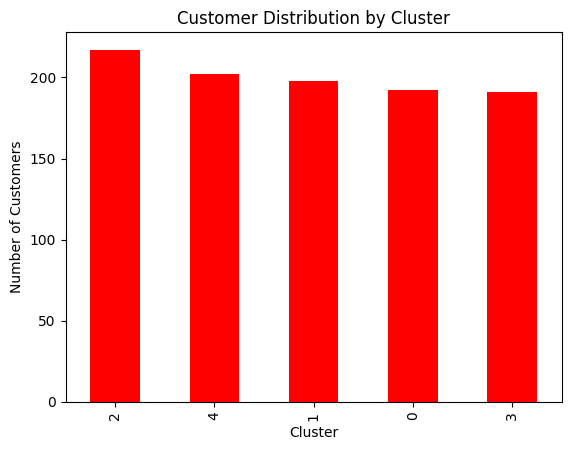

In [ ]:
# Bar chart of cluster distribution
df['Cluster'].value_counts().plot(kind='bar', color='red')

plt.title('Customer Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

plt.show()


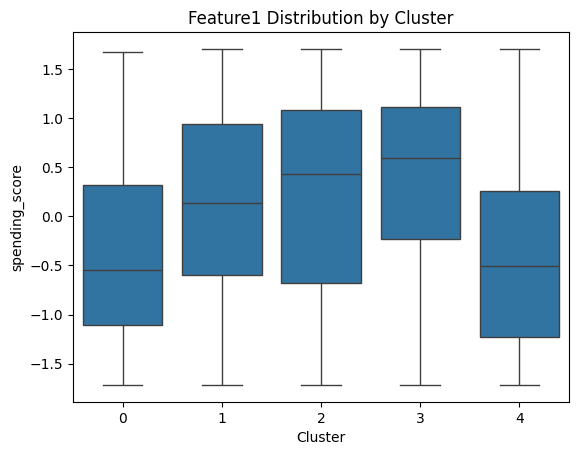

In [ ]:
# Box plot for a feature
sns.boxplot(x='Cluster', y='spending_score', data=df)

plt.title('Feature1 Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('spending_score')

plt.show()
